In [24]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:\\Users\\kaush\\Desktop\\IIT SRFP\\code\\n50.csv')
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

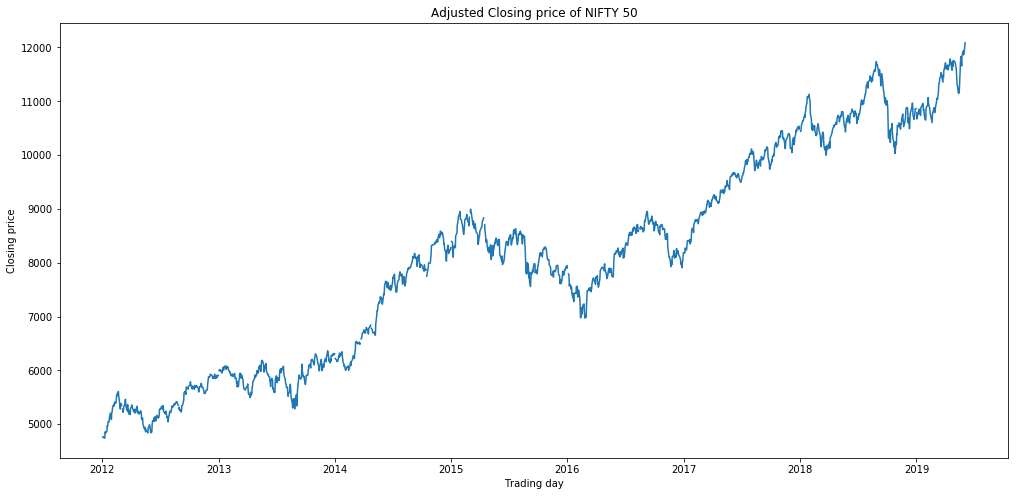

In [25]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'])
plt.title('Adjusted Closing price of NIFTY 50')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [26]:
df.dtypes
drop_cols = ['Open','High','Low','Close','Volume','Date']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,4765.299805
2012-01-04,4749.649902
2012-01-05,4749.950195
2012-01-06,4754.100098
2012-01-07,NaN


In [27]:
df1= df.dropna()
df1.isnull().sum()
df1.head()

,Adj Close
Date,
2012-01-03,4765.299805
2012-01-04,4749.649902
2012-01-05,4749.950195
2012-01-06,4754.100098
2012-01-09,4742.799805


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=19284.659, BIC=19311.845, Fit time=28.626 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=20349.186, BIC=20360.060, Fit time=0.403 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=19897.519, BIC=19919.268, Fit time=34.837 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=19283.380, BIC=19305.129, Fit time=17.290 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=19283.039, BIC=19310.225, Fit time=22.504 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=19896.544, BIC=19918.293, Fit time=30.617 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=19286.958, BIC=19319.581, Fit time=140.535 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=20335.956, BIC=20352.267, Fit time=3.384 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=19286.965, BIC=19325.025, Fit time=128.038 seconds
F

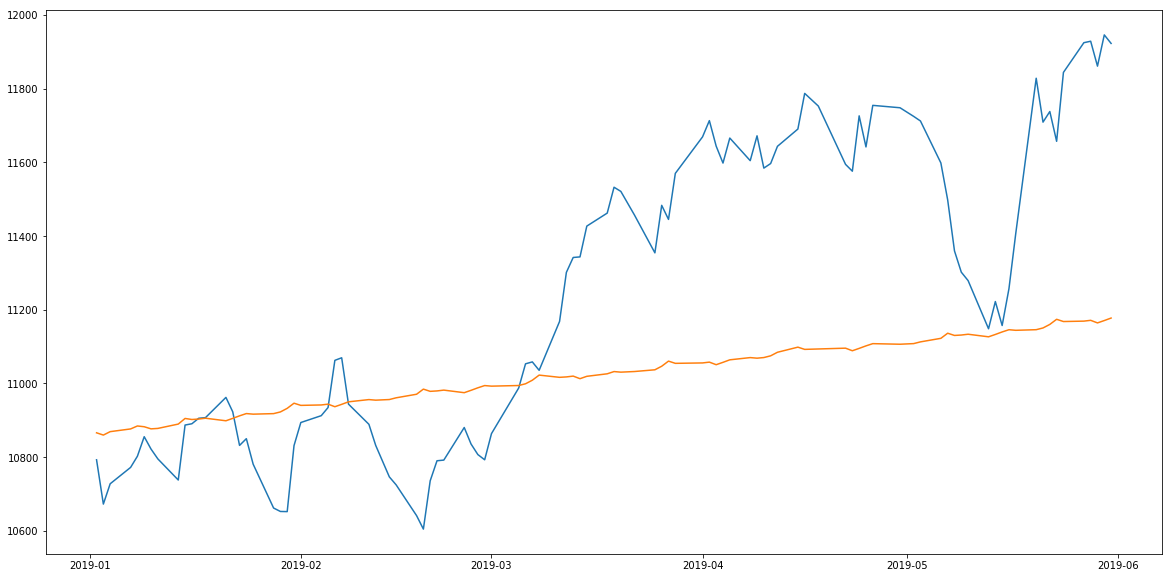

In [31]:
from pyramid.arima import auto_arima
train = df1.loc['2012-01-02':'2019-01-01']
test = df1.loc['2019-01-01':'2019-06-01']
model = auto_arima(train, start_p=1, start_q=1, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.show()


In [32]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print(rms)

394.49593874758045
